In [1]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

In [2]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

In [3]:
"""
    condiones_iniciales_2D(f::Function, t_range, a, b)

Función que guarda en un array de de 2×n una parametrización `f` para un rango `t_range`.
Los parámetros `a` y `b` sirven para parametrizaciones que requieran del mapeo de Hénon.

"""

function condiones_iniciales_2D(f::Function, t_range, a, b)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i], a, b)[1]
        CI[2, i] = f(t_range[i], a, b)[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D

In [5]:
"""
    iterator(f::Function, X0, a, b, N)

Itera un array `X0` usando un mapeo `f`, un número `N` de veces.

"""


function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

iterator

In [4]:
σ(t, a, b) = (cos(t), sin(t))

σ (generic function with 1 method)

In [6]:
function itera_parametrizacion_henon(n)
    
    #1 - a*x^2 + y , b*x
    
    x = "cos(t)"
    y = "sin(t)"

    for i in 1:n

        xi = "1 - a*($x)^2 + ($y)"
        yi = "b*($x)"
        x = xi
        y = yi

    end

    ex = parse(x*" , "*y)
    ex_ret = :( (t, a, b) -> $ex )
    eval(ex_ret)
end 

itera_parametrizacion_henon (generic function with 1 method)

## Gifs julia set mapeo de Hénon

In [7]:
"""Función que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon(x,y,a,b)
                iterandos[j,i]=k
                    if 
                    sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon


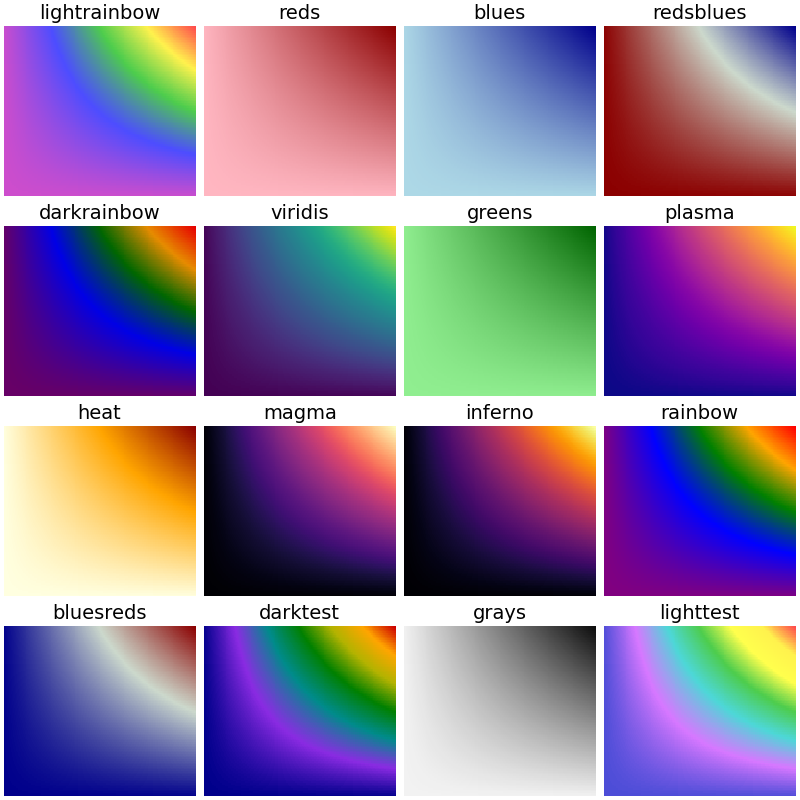

In [8]:
z = (1:100)*(1:200)';
p = plot(layout=length(PlotUtils._gradients), axis=nothing, leg=false, size=(800,800))
for (i,cmap) in enumerate(keys(PlotUtils._gradients))
   heatmap!(p[i], z, fillcolor=cmap, title=string(cmap))
end; p

In [25]:
function animate_julia_set_Henon(a_range, b, x_range, y_range, m, R, color_gradient::Symbol, tamano)
    
    @animate for i=1:length(a_range)
    
        Ima = Julia_set_Henon(a_range[i], b , x_range, -y_range, m, R)

        heatmap(x_range, y_range, Ima, cbar=false, fillcolor= color_gradient,
        size = tamano, yflip=false, annotations=(1, -3.3, text("a = $(a_range[i])  b = $b", :white)))

    end
end

animate_julia_set_Henon (generic function with 1 method)

Aquí van nos gifs.

## Transformaciones

In [10]:
T′(x, y, a, b) = (x, y + 1 - a*x^2)

T′ (generic function with 1 method)

In [11]:
T′′(x, y, a, b) = (b*x, y)

T′′ (generic function with 1 method)

In [12]:
T′′′(x, y, a, b) = (y, x)

T′′′ (generic function with 1 method)

In [13]:
θ(t, a, b) = (a*cos(t), b*sin(t))

θ (generic function with 1 method)

In [14]:
t_rango = 0.0:0.001:2π

0.0:0.001:6.283

In [15]:
elipse = condiones_iniciales_2D(θ, t_rango, 2.0, 0.6)

2×6284 Array{Float64,2}:
 2.0  2.0     2.0     1.99999  1.99998     …   2.0           2.0        
 0.0  0.0006  0.0012  0.0018   0.00239999     -0.000711184  -0.000111184

In [16]:
T′_elipse = iterator(T′, elipse, 1.4, 0.3, 1)
T′′_elipse = iterator(T′′, T′_elipse, 1.4, 0.3, 1)
T′′′_elipse = iterator(T′′′, T′′_elipse, 1.4, 0.3, 1)

2×6284 Array{Float64,2}:
 -4.6  -4.59939  -4.59878   -4.59815   …  -4.60128   -4.6007  -4.60011
  0.6   0.6       0.599999   0.599997      0.599999   0.6      0.6    


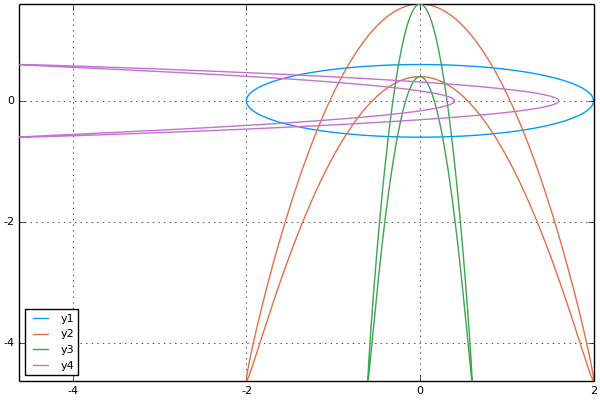

In [17]:
plot(elipse[1,:], elipse[2,:])
plot!(T′_elipse[1,:], T′_elipse[2,:])
plot!(T′′_elipse[1,:], T′′_elipse[2,:])
plot!(T′′′_elipse[1,:], T′′′_elipse[2,:])

In [20]:
plot(elipse[1,:], elipse[2,:], xlims=(-4,4), ylims=(-4,4), size=(400,400),
annotations=(-0.3, 3.8, text(L"y", :black)), leg= nothing,axis = nothing)
plot!(-4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x", :black)), linewidth = 0.3)
plot!(zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("a", :black)), linewidth = 0.3)
png("doblamiento_T.png")

In [21]:
plot(T′_elipse[1,:], T′_elipse[2,:], xlims=(-5,5), ylims=(-5,5), size=(400,400),
annotations=(-0.3, 4.8, text(L"y'", :black)), leg= nothing,axis = nothing)
plot!(-5:5, zeros(length(-5:5)), color = :black, annotations=(4.8, -0.3, text(L"x'", :black)), linewidth = 0.3)
plot!(zeros(length(-5:5)), -5:5, color = :black, annotations=(-4.5, -4.5, text("b", :black)), linewidth = 0.3)
png("doblamiento_T'.png")

In [22]:
plot(T′′_elipse[1,:], T′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4) , size=(400,400),
annotations=(-0.3, 3.8, text(L"y''", :black)), leg= nothing,axis = nothing)
plot!(-4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x''", :black)), linewidth = 0.3)
plot!(zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("c", :black)), linewidth = 0.3)
png("doblamiento_T''.png")

In [23]:
plot(T′′′_elipse[1,:], T′′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4) , size=(400,400),
annotations=(-0.3, 3.8, text(L"y'''", :black)), leg= nothing,axis = nothing)
plot!(-4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x'''", :black)), linewidth = 0.3)
plot!(zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("d", :black)), linewidth = 0.3)
png("doblamiento_T'''.png")

In [24]:
xy_range = -4:4
p = plot(layout=4, leg=false, axis = nothing, size=(600,600))
plot!(p[1], elipse[1,:], elipse[2,:], xlims=(-4,4), ylims=(-4,4),
annotations=(-0.3, 3.8, text(L"y", :black)))
plot!(p[1], -4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.3, text(L"x", :black)), linewidth = 0.3)
plot!(p[1], zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("a", :black)), linewidth = 0.3)

plot!(p[2], T′_elipse[1,:], T′_elipse[2,:], xlims=(-5,5), ylims=(-5,5),
annotations=(-0.3, 4.7, text(L"y'", :black)))
plot!(p[2], -5:5, zeros(length(-5:5)), color = :black, annotations=(4.7, -0.5, text(L"x'", :black)), linewidth = 0.3)
plot!(p[2], zeros(length(-5:5)), -5:5, color = :black, annotations=(-4.5, -4.5, text("b", :black)), linewidth = 0.3)

plot!(p[3], T′′_elipse[1,:], T′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4),
annotations=(-0.3, 3.8, text(L"y''", :black)))
plot!(p[3], -4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.4, text(L"x''", :black)), linewidth = 0.3)
plot!(p[3], zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("c", :black)), linewidth = 0.3)

plot!(p[4], T′′′_elipse[1,:], T′′′_elipse[2,:], xlims=(-4,4), ylims=(-4,4),
annotations=(-0.3, 3.8, text(L"y'''", :black)))
plot!(p[4], -4:4, zeros(length(-4:4)), color = :black, annotations=(3.8, -0.4, text(L"x'''", :black)), linewidth = 0.3)
plot!(p[4], zeros(length(-4:4)), -4:4, color = :black, annotations=(-3.5, -3.5, text("d", :black)), linewidth = 0.3)
png("doblamiento_all.png")